### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [74]:
##read in base data frames, turn blanks into NA character strings
ny = read.csv('new_york_city.csv', na.strings=c("","NA"))
wash = read.csv('washington.csv', na.strings=c("","NA"))
chi = read.csv('chicago.csv', na.strings=c("","NA"))

In [75]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [76]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [77]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**How many bikes are rented daily in each city, and what is the average travel time for users in different cities?**

In [78]:
##load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

## Data wrangling: Add state column to each state data table. Update df names
# to keep raw data intact
ny.new = mutate(ny, state = 'New York City, NY')
wash.new = mutate(wash, state = 'Washington DC')
chi.new = mutate(chi, state = 'Chicago, IL')
#check that columns were added
head(wash)

#extract date from the Start.Time
ny.new$date = date(ny$Start.Time)
wash.new$date = date(ymd_hms(wash$Start.Time))
chi.new$date = date(ymd_hms(chi$Start.Time))
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [79]:
##summarise rental information for each state
#create function that subsets data frames to combine for duration box plot
duration = function(df){
    df %>% select (date, Trip.Duration, state) %>% 
    mutate (Dur.Min = Trip.Duration/60, Dur.Hour = Trip.Duration/3600)
    }
nyd = duration (ny.new)
washd = duration(wash.new)
chid = duration(chi.new)
#combine state df into one df
dur = rbind(nyd, washd, chid)
#sanity check
#head(dur)

## base code that went into making the duration function
#nyd = ny %>% select (date, Trip.Duration, state) %>% mutate (Dur.Min = Trip.Duration/60, Dur.Hour = Trip.Duration/3600) 
#washd = wash %>% select(date, Trip.Duration, state)%>% mutate (Dur.Min = Trip.Duration/60, Dur.Hour = Trip.Duration/3600)
#chid = chi %>% select(date, Trip.Duration,state)%>% mutate (Dur.Min = Trip.Duration/60, Dur.Hour = Trip.Duration/3600)


##avg duration of bike rentals for each state dataframe
#function to calcuate average duration for a given dataframe
avgdur = function(df){
    df %>% group_by(state) %>% 
    summarise(avg.duration = mean(Trip.Duration, na.rm = TRUE))
}

#use avgdur function to get average duration for each city/state df
ny.dur = avgdur(ny.new)
wash.dur = avgdur(wash.new)
chi.dur = avgdur(chi.new)
#merge state dataframes into 1 using row bind
dur.avg = rbind(ny.dur, wash.dur, chi.dur)
#sanity check
head(dur.avg)

##base code to build avgdur function
#ny.dur = ny %>% group_by(state) %>% summarise(avg.duration = mean(Trip.Duration, na.rm = TRUE))
#wash.dur = wash %>% group_by(state)%>% summarise(avg.duration = mean(Trip.Duration, na.rm = TRUE))
#chi.dur = chi %>% group_by(state) %>% summarise(avg.duration = mean(Trip.Duration, na.rm = TRUE))


#daily rental count
#function to calculate rental counts
rent.count = function(df){
    df %>% group_by(state, date) %>% 
    count() %>% rename (rental.count = n)
}

#calculate counts for each state df using rent.count function
ny.count = rent.count(ny.new)
wash.count = rent.count(wash.new)
chi.count = rent.count(chi.new)

#combine state df into 1 df
count = rbind(ny.count, wash.count, chi.count)
#sanity check
head(count)

#base code to build rent.count function
#ny.count = ny %>% group_by(state, date) %>% count() %>% rename (rental.count = n)
#wash.count = wash %>% group_by(state, date) %>% count() %>% rename (rental.count = n)
#chi.count = chi %>% group_by(state, date) %>% count() %>% rename (rental.count = n)





state,avg.duration
"New York City, NY",903.6147
Washington DC,1233.9533
"Chicago, IL",937.1728


state,date,rental.count
"New York City, NY",2017-01-01,138
"New York City, NY",2017-01-02,74
"New York City, NY",2017-01-03,120
"New York City, NY",2017-01-04,269
"New York City, NY",2017-01-05,241
"New York City, NY",2017-01-06,181


Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 6752 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6752 rows containing non-finite values (stat_summary).”

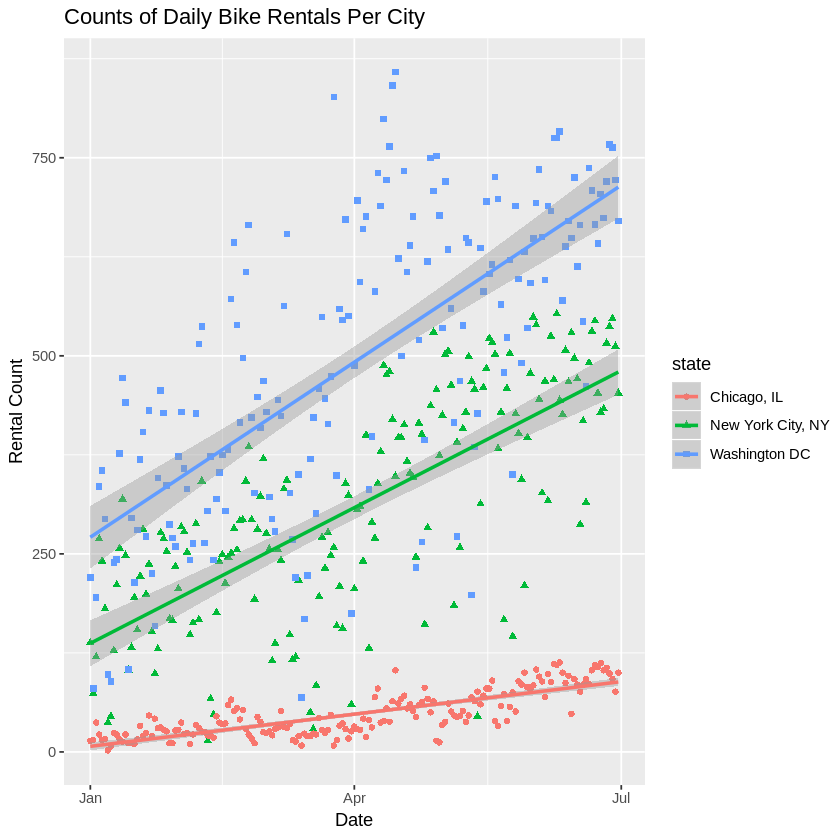

dur$state: Chicago, IL
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 
------------------------------------------------------------ 
dur$state: New York City, NY
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.017     6.133    10.167    15.060    17.517 18143.900         1 
------------------------------------------------------------ 
dur$state: Washington DC
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.005     6.848    11.783    20.566    20.554 15076.523         1 

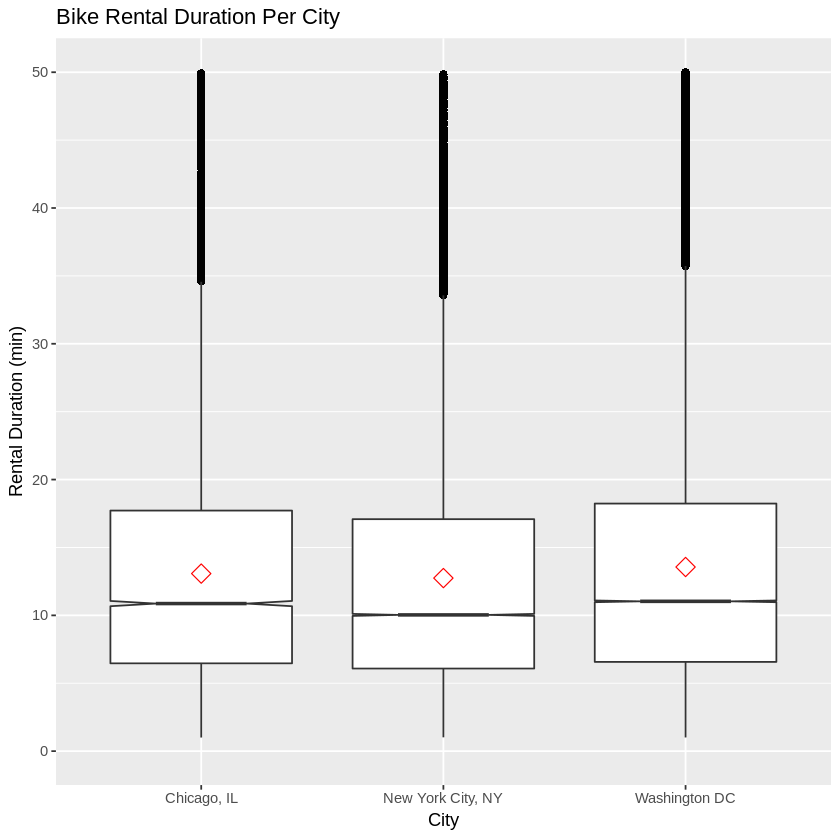

In [80]:
#scatter plot of daily rentals per city/state
ggplot(count, aes(x=date, y=rental.count, shape=state, color=state)) + 
    geom_point() + 
    geom_smooth(method=lm) +
    labs (title = 'Counts of Daily Bike Rentals Per City', x = 'Date', y = 'Rental Count')

#box plot of avg. rental duraton per city/state
#reduced Y variable limits to better see the box plot
ggplot(dur, aes(x= state, y=Dur.Min)) + 
        geom_boxplot(outlier.colour="black", outlier.shape=16,
             outlier.size=2, notch=TRUE) + 
        stat_summary(fun.y=mean, geom="point", shape=23, size=4, color = 'red') +
        ylim (0, 50) +
        labs(title = 'Bike Rental Duration Per City', x = 'City', y = 'Rental Duration (min)' )

by(dur$Dur.Min, dur$state, summary)

Looking at the daily count of bike rentals per city, we can see that people in New York City and Washington DC rent bikes much more often than Chicago. Additionally, we see that the number of rentals increases throughout the year, which is likely due to seasonal weather changes. People like biking in warmer weather than colder weather. The higher bike counts in Washington DC and New York City could be a factor of overall population count, but we'd have to evaluate further. We also see a much large spread for New York Cuty and Washington DC, whereas Chicago sees much less variation in daily bike rentals over time.

Looking at the duration of bike rentals, people in each city seem to rent their bikes for the same relative amount of time. The red diamonds on the box plot indicate the average rental duration; these don't seem to vary widely per location. So while the number of rentals varies broadly depending on location, each person is renting their bike for a fairly standard length of time. Ranging mostly between 6 and 20 minutes. Though people in Washington DC are renting bikes for slightly longer. Perhaps this is because Washington DC covers a larger spatial area, so their destinations are further apart which takes longer to bike to them. Versus location distances within very populous, but smaller, cities.

### Question 2

**What are the counts of each user type and gender (only available for NYC and Chicago)?**

In [82]:
#rental count by gender
gender.ny = ny.new %>% group_by(state, Gender, User.Type) %>% count() %>% rename (rental.count = n)
gender.chi = chi.new %>% group_by(state, Gender, User.Type) %>% count() %>% rename (rental.count = n)
#head(gender.ny)
gender = rbind(gender.ny, gender.chi)
gender = gender %>% group_by(state, User.Type) %>% mutate(percent = rental.count/sum(rental.count))
head(gender)

state,Gender,User.Type,rental.count,percent
"New York City, NY",Female,Customer,324,0.05829435
"New York City, NY",Female,Subscriber,11804,0.24044161
"New York City, NY",Female,NA,31,0.26050420
"New York City, NY",Male,Customer,491,0.08834113
"New York City, NY",Male,Subscriber,36625,0.74603304
"New York City, NY",Male,NA,85,0.71428571


gender$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   31.0   250.8  1023.5  3470.5  4243.2 11804.0 
------------------------------------------------------------ 
gender$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   85.0   389.5  2825.0 10590.0 13025.5 36625.0 

gender$User.Type: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  324.0   449.2  1118.5  1826.0  2495.2  4743.0 
------------------------------------------------------------ 
gender$User.Type: Subscriber
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   928.8  3441.0  9329.3 10142.8 36625.0 

gender$state: Chicago, IL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1    1723    1726    1746    5159 
------------------------------------------------------------ 
gender$state: New York City, NY
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3      85     491    6086    4743   36625 

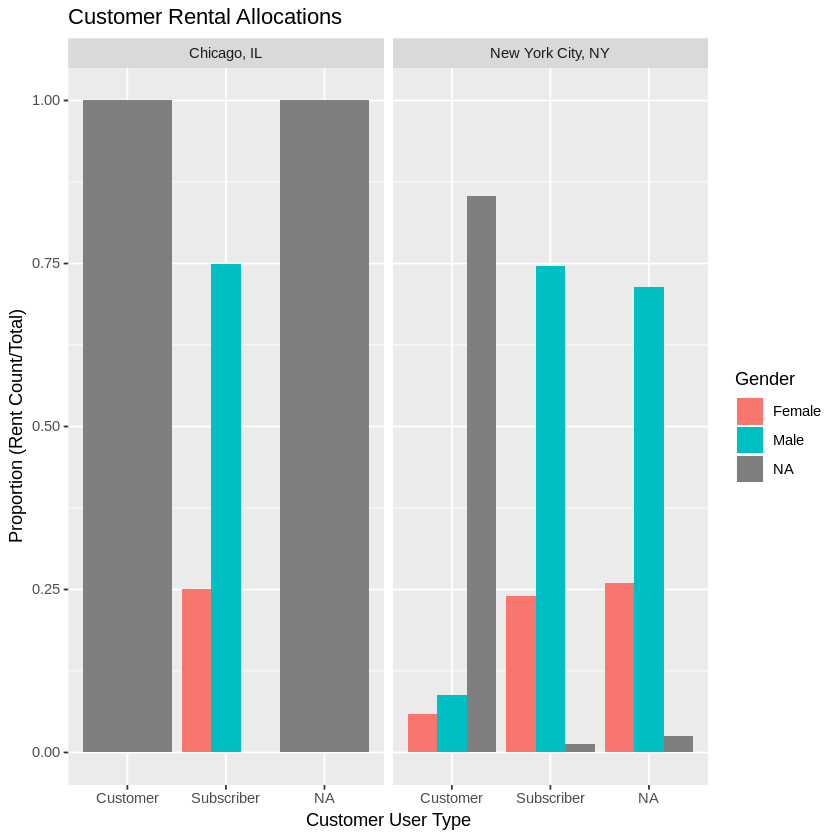

In [102]:
## visualize gender and user type
#summary statistics for rental counts by gender
by(gender$rental.count, gender$Gender,summary)
by(gender$rental.count, gender$User.Type,summary)
by(gender$rental.count, gender$state,summary)

ggplot(gender, aes(x = User.Type, y = percent, fill = Gender)) + 
    geom_bar(stat='identity', position='dodge') +
    facet_wrap(~state) +
    labs (title = 'Customer Rental Allocations', x = 'Customer User Type', y = 'Proportion (Rent Count/Total)')

Looking more specifically into who is renting bikes, the summary tables and figure evaluate rental counts for gender of clients within different user.types. Since gender is only within the New York and Chicago data tables, Washington DC has been excluded from this analysis. And since the total number of rentals in New York City is much greater than in Chicago, I use a proportion value to evalutae gender and user type roles more equally within the figure. The figure is displaying what proportion of bike rentals occurs for each gender within the total of each user type. So the summation of proportion for each user type will be 1. 

In Chicago, only subscribers indicated their genders, whereas in New York City there was a small subset of customers and non-listed user types willing to list their genders. Across the board, for user types that indicated gender, about 75% of users identify as male and about 25% identify as female. This also true for New York City customers if you ignore the NA, non-listed gender within that user type. Even though New York had significantly more rentals that Chicoago, the distribution of genders is fairly equal. 

### Question 3

**What is the most common trip from start to end (i.e., most frequent combination of start station and end station)?**

In [84]:
## find frequency (count) of Start and End station combinations
#library(dplyr)
route_freq = function(df){
    df %>% select (state, Start.Station, End.Station) %>% 
    group_by(state) %>% count_( vars = c('Start.Station','End.Station')) %>%
            rename (freq = n)
}

ny.route = route_freq(ny.new)
wash.route = route_freq(wash.new)
chi.route = route_freq(chi.new)

#stack the data tables into 1
route = bind_rows(ny.route, chi.route, wash.route)
#sanity check
#head(route)

# base code for route_freq function
#ny.route = ny %>% select (state, Start.Station, End.Station) %>% group_by(state) %>% count_( vars = c('Start.Station','End.Station')) %>%
            #rename (freq = n)
#chi.route = chi %>% select (state, Start.Station, End.Station) %>% group_by(state) %>% count_( vars = c('Start.Station','End.Station')) %>%
            #rename (freq = n)
#wash.route = wash %>% select (state, Start.Station, End.Station) %>% group_by(state) %>% count_( vars = c('Start.Station','End.Station')) %>%
            #rename (freq = n)

#class(chi.route$freq); class(wash.route$freq); class(ny.route$freq)



Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [98]:
##find top 3 routes per state. Use for bar plot visualization
#library(dplyr)
#library (tidyr)
top.route = route %>% group_by(state) %>% top_n(n = 5) %>% unite(route, c('Start.Station', 'End.Station'), sep = ", ") %>% 
            arrange(state, freq)
top.route

Selecting by freq


state,route,freq
"Chicago, IL","Lake Shore Dr & North Blvd, Streeter Dr & Grand Ave",17
"Chicago, IL","Streeter Dr & Grand Ave, Theater on the Lake",17
"Chicago, IL","Streeter Dr & Grand Ave, Lake Shore Dr & North Blvd",23
"Chicago, IL","Lake Shore Dr & Monroe St, Streeter Dr & Grand Ave",32
"Chicago, IL","Streeter Dr & Grand Ave, Streeter Dr & Grand Ave",32
"New York City, NY","Pershing Square North, Broadway & W 32 St",20
"New York City, NY","Centre St & Chambers St, Centre St & Chambers St",24
"New York City, NY","Pershing Square North, W 33 St & 7 Ave",24
"New York City, NY","Central Park S & 6 Ave, Central Park S & 6 Ave",31
"New York City, NY","E 7 St & Avenue A, Cooper Square & E 7 St",33


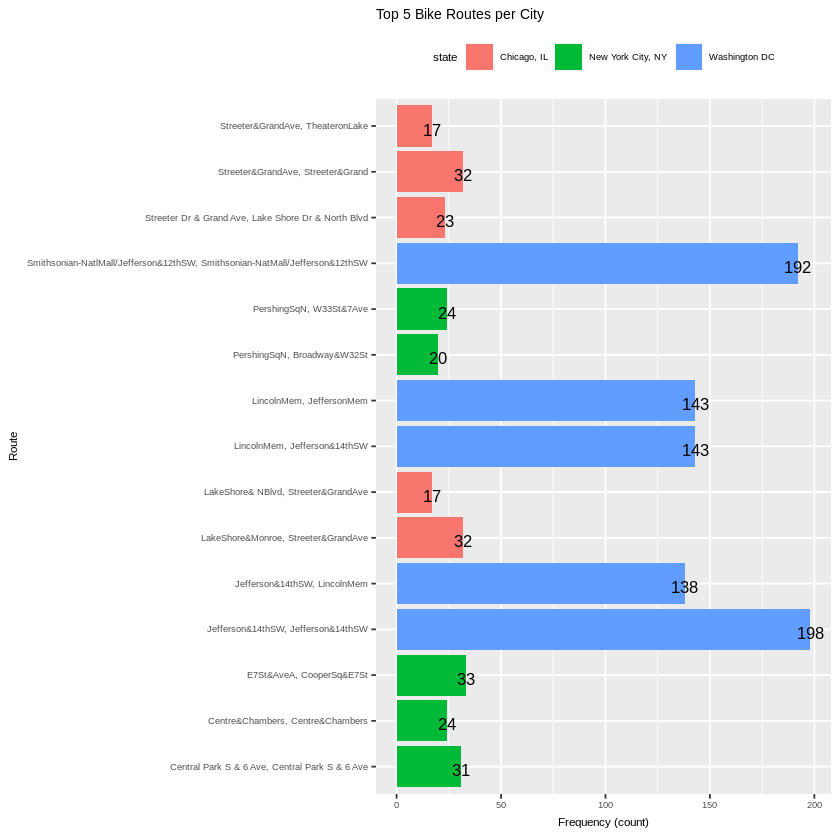

In [106]:

##visualize the route frequencies. facet_wrap by state
rt = ggplot(top.route, aes(route, freq, fill=state)) + 
        geom_col() +
        coord_flip() +
        theme(legend.position = "top") +
       # scale_x_discrete(labels = abbreviate) + 
        geom_text(aes(y=freq, label=freq), vjust=.8, 
            color="black", size=3.5) +
        scale_x_discrete(
    "Route",
    labels = c(
      "Central Park S & 6 Ave, Central Park S & 6 Ave " = "CParkS&6Ave, CParkS&6Ave",
      "Centre St & Chambers St, Centre St & Chambers St" = "Centre&Chambers, Centre&Chambers",
      "E 7 St & Avenue A, Cooper Square & E 7 St" = "E7St&AveA, CooperSq&E7St",
      "Pershing Square North, Broadway & W 32 St" = "PershingSqN, Broadway&W32St",
      "Pershing Square North, W 33 St & 7 Ave" = "PershingSqN, W33St&7Ave",
      "Lake Shore Dr & Monroe St, Streeter Dr & Grand Ave" = "LakeShore&Monroe, Streeter&GrandAve",
      "Lake Shore Dr & North Blvd, Streeter Dr & Grand Ave" = "LakeShore& NBlvd, Streeter&GrandAve",
      "Streeter Dr & Grand Ave, Lake Shore Dr & North Blvd " = "Streeter&GrandAve, LakeShore&NBlvd ",
      "Streeter Dr & Grand Ave, Streeter Dr & Grand Ave" = "Streeter&GrandAve, Streeter&Grand",
      "Streeter Dr & Grand Ave, Theater on the Lake" = "Streeter&GrandAve, TheateronLake",
      "Jefferson Dr & 14th St SW, Jefferson Dr & 14th St SW" = "Jefferson&14thSW, Jefferson&14thSW",
      "Jefferson Dr & 14th St SW, Lincoln Memorial" = "Jefferson&14thSW, LincolnMem",
      "Lincoln Memorial, Jefferson Dr & 14th St SW" = "LincolnMem, Jefferson&14thSW",
      "Lincoln Memorial, Jefferson Memorial" = "LincolnMem, JeffersonMem",
      "Smithsonian-National Mall / Jefferson Dr & 12th St SW, Smithsonian-National Mall / Jefferson Dr & 12th St SW" = "Smithsonian-NatlMall/Jefferson&12thSW, Smithsonian-NatMall/Jefferson&12thSW"
    )
  ) + 
    theme(text = element_text(size=7)) +
        labs(title = "Top 5 Bike Routes per City", y = 'Frequency (count)', x = 'Route (Start, End)') 
rt

With the first two questions answering who the clientel is and how often they are renting, this last question asks where are they going. The figure displays that top 5 routes taken by rental bike users per city, with frequency on the bottom x-axis and the route on the side y-axis. Initially you notice that the top routes from Washington DC are used at a much higher frequency than the top routes used in New York City or Chicago; this might suggest that most users in Washington DC use the same routes much more often, and users from New York and Chicago use route more variably. The 2nd thing to notice is that the most frequented route for each city has the same start and end destination; the exception is New York, where this is true for the second most frequented route. Meaning users and picking up and dropping off the bikes in the same location. The next most used routes for eachcity often include the same start and/or end locations. So while they may not be starting and stopping in the same locations, most users are using the same locations as either their starting or ending destinations. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [107]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')